# Project: Investigate a Dataset - TMDB
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


### Question(s) for Analysis


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
raw_df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

In [3]:
raw_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Checking for missing data

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
raw_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There's nan values in imdb_id, director, tagline, genres, Cast, Homepage, and production companies

### Cleaning data

In [6]:
#dropping columns with nans
raw_df.drop(['homepage','tagline','keywords','production_companies'],axis=1,inplace=True)


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


In [8]:
#Dropping rows with nan values
cleaned_df= raw_df.dropna(how='any')

In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
id                10725 non-null int64
imdb_id           10725 non-null object
popularity        10725 non-null float64
budget            10725 non-null int64
revenue           10725 non-null int64
original_title    10725 non-null object
cast              10725 non-null object
director          10725 non-null object
overview          10725 non-null object
runtime           10725 non-null int64
genres            10725 non-null object
release_date      10725 non-null object
vote_count        10725 non-null int64
vote_average      10725 non-null float64
release_year      10725 non-null int64
budget_adj        10725 non-null float64
revenue_adj       10725 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


In [10]:
cleaned_df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Dropped columns with signifiant nans, then dropped rows with nans 

In [11]:
cleaned_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#copying data to make a more concise name
imdb_df = cleaned_df.copy()

<a id='eda'></a>
## Exploratory Data Analysis



### Which genre makes more revenue?

In [13]:
# I will reduce columns to only those i will use in my analysis


In [14]:
imdb_df_filtered= imdb_df[['genres','budget','revenue','popularity']]

In [15]:
imdb_df_groupedby=imdb_df_filtered.groupby(['genres']).sum().sort_values(by=['revenue'],ascending=False).reset_index()

#### reducing dataframe to the first 10 genres that generates the highest revenues

In [16]:
imdb_df_shorted=imdb_df_groupedby[0:10]

In [17]:
imdb_df_shorted

,genres,budget,revenue,popularity
0,Comedy,6771216919,20323889661,374.452791
1,Drama,5787292732,15107533347,360.824954
2,Comedy|Romance,3413566906,11545724341,159.028582
3,Adventure|Fantasy|Action,1776900000,7597483556,57.045550
4,Comedy|Drama|Romance,2405512239,7251175696,125.524195
5,Drama|Romance,2703887169,6798112125,161.440368
6,Animation|Family,1842500000,6701726154,77.556558
7,Action|Adventure|Science Fiction,1594500001,6420484308,56.637212
8,Adventure|Fantasy|Family,1280000000,6079516484,42.190055
9,Adventure|Action|Science Fiction,893350000,5256276988,40.231896


#### Creating a bar chart to visualize data

Text(0.5,1,'Highest revenues for different genres')

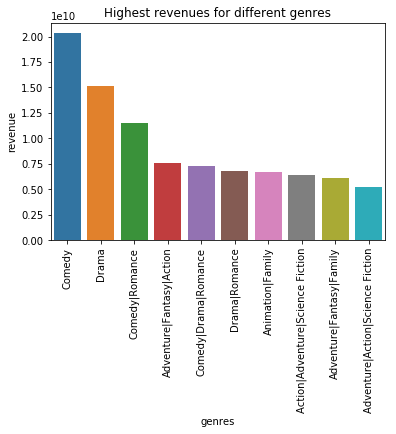

In [18]:
sns.barplot(x=imdb_df_shorted['genres'],y=imdb_df_shorted['revenue'])
plt.xticks(rotation=90)
plt.title("Highest revenues for different genres")


### It appears that Comedian and Drama movies are the highest movies generates revenue

### Lets compare the results with budget 

Text(0.5,1,'Highest budgets for different genres')

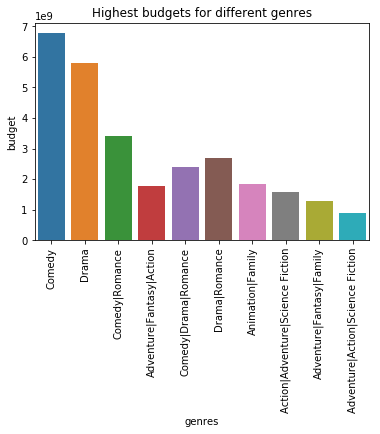

In [19]:
sns.barplot(x=imdb_df_shorted['genres'],y=imdb_df_shorted['budget'])
plt.xticks(rotation=90)
plt.title("Highest budgets for different genres")


### from the results it seems that there's a relation between budget and revenue because also comedian and drama movies are consuming the highest budgets

### lets go further and discover how is the relation between both revenue and budget

### Research Question 2: How is the relation between Revenue and Budget?

Text(0.5,1,'Relation between Budget and Revenue')

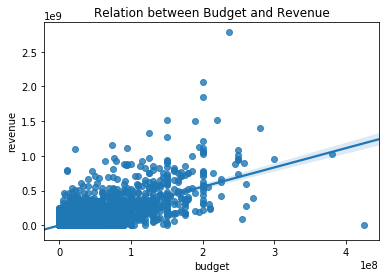

In [20]:
sns.regplot(data=imdb_df, x="budget", y="revenue")
plt.title("Relation between Budget and Revenue")

It seems the relation is positive


<a id='conclusions'></a>
## Conclusions

In conclusion, Drama and Comedian movies are highest genres that generates revenue and thats due to they used the highest budgets.

### Limitations
its sad that there's some genres are missing data about budget and revnue so may due to that the results may be baised.




In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0